# Quantium Virtual Internship - Retail Strategy and Analytics - Task 2
## Author: KAMAKSHI
## Task: Experimentation and uplift testing
Extend your analysis from Task 1 to help you identify benchmark stores that allow you to test the impact of the trial store layouts on customer sales.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"D:\Quantium\QVI_data.csv")
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [6]:
table=pd.pivot_table(df, values =['TOT_SALES','TXN_ID','LYLTY_CARD_NBR'],index='STORE_NBR',
               aggfunc={'TOT_SALES':np.sum,'TXN_ID':len,'LYLTY_CARD_NBR':len})
table.columns = ['Count_LYLTY_CARD_NBR','Sum_TOT_SALES','Count_TOT_SALES']
table.sort_values('Sum_TOT_SALES',ascending=False)

,Count_LYLTY_CARD_NBR,Sum_TOT_SALES,Count_TOT_SALES
STORE_NBR,,,
226,2020,17605.45,2020
88,1873,16333.25,1873
165,1819,15973.75,1819
40,1764,15559.50,1764
237,1785,15539.50,1785
...,...,...,...
206,2,7.60,2
252,2,7.40,2
11,2,6.70,2


In [7]:
pd.crosstab(df.BRAND,df.PREMIUM_CUSTOMER,rownames = ['Brand'],colnames = ['Premium customer'])
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.

Premium customer,Budget,Mainstream,Premium
Brand,,,
BURGER,579,548,437
CCS,1679,1631,1241
CHEETOS,1051,1111,765
CHEEZELS,1626,1735,1242
COBS,3274,3889,2530
DORITOS,9818,11192,7135
FRENCH,539,507,372
GRNWVES,2656,3037,2047
INFUZIONS,4922,5550,3729


In [7]:
df.groupby(['BRAND','PREMIUM_CUSTOMER'])['PREMIUM_CUSTOMER'].count().sort_values(ascending=False)[0:10]

BRAND     PREMIUM_CUSTOMER
KETTLE    Mainstream          16423
          Budget              14154
SMITHS    Mainstream          11842
          Budget              11548
DORITOS   Mainstream          11192
KETTLE    Premium             10711
PRINGLES  Mainstream           9903
DORITOS   Budget               9818
PRINGLES  Budget               8620
SMITHS    Premium              8433
Name: PREMIUM_CUSTOMER, dtype: int64

In [8]:
df.groupby(['BRAND','PREMIUM_CUSTOMER']).TOT_SALES.sum().sort_values(ascending=False)[0:10]

BRAND     PREMIUM_CUSTOMER
KETTLE    Mainstream          154477.00
          Budget              134407.80
          Premium             101355.00
DORITOS   Mainstream           95638.90
SMITHS    Mainstream           84726.20
DORITOS   Budget               83961.25
SMITHS    Budget               80744.00
PRINGLES  Mainstream           69785.70
          Budget               61201.70
DORITOS   Premium              60990.75
Name: TOT_SALES, dtype: float64

In [20]:
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [51]:
df.loc[:,'STORE_NBR']

0          1
1          1
2          1
3          1
4          1
          ..
264829    88
264830    88
264831    88
264832    88
264833    88
Name: STORE_NBR, Length: 264834, dtype: int64

In [29]:
df.iloc[-5:,-2:]

,LIFESTAGE,PREMIUM_CUSTOMER
264829,YOUNG FAMILIES,Mainstream
264830,YOUNG FAMILIES,Premium
264831,OLDER FAMILIES,Budget
264832,OLDER FAMILIES,Budget
264833,YOUNG SINGLES/COUPLES,Mainstream


In [54]:
df.loc[df.STORE_NBR>70,'TOT_SALES'].sort_values(ascending=False)

187012    29.5
118381    29.5
91451     29.5
190554    29.5
178850    28.5
          ... 
249871     1.5
135939     1.5
121935     1.5
187858     1.5
231788     1.5
Name: TOT_SALES, Length: 197365, dtype: float64

The client has selected store numbers 77, 86 and 88 as trial stores and want
control stores to be established stores that are operational for the entire
observation period.
We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer
Let's first create the metrics of interest and filter to stores that are present
throughout the pre-trial period.

#### Calculate these measures over time for each store
#### Add a new month ID column in the data with the format yyyymm.

In [8]:
type(df.DATE)

pandas.core.series.Series

In [4]:
#split=df.DATE.str.split('-')
#monthid=[]
#m=0
#for x in split:
#    m="".join(x[0:2])
#    monthid.append(m)
#df['MONTH_ID'] = monthid    

In [9]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [10]:
df['MONTHID'] = df.DATE.dt.strftime('%Y%m')

In [11]:
df['MONTHID'] = df.MONTHID.astype('int')
df.MONTHID

0         201810
1         201809
2         201903
3         201903
4         201811
           ...  
264829    201812
264830    201810
264831    201810
264832    201810
264833    201812
Name: MONTHID, Length: 264834, dtype: int32

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
 12  MONTHID           264834 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), objec

#### Next, we define the measure calculations to use during the analysis.
For each store and month calculate 
- total sales, 
- number of customers,
- transactions per customer, 
- chips per customer and 
- the average price per unit.


In [13]:
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER', 'MONTHID'],
      dtype='object')

In [14]:
def metric():
    group = df.groupby(['STORE_NBR','MONTHID'])
    total_sale = group.TOT_SALES.sum()
    num_cus = group.LYLTY_CARD_NBR.nunique()
    trans_cus = group.TXN_ID.nunique()/num_cus
    chips_cus = group.PROD_QTY.sum()/num_cus
    chips_trans = group.PROD_QTY.sum()/group.TXN_ID.nunique()
    price_per_unit = total_sale/group.PROD_QTY.sum()
    table = [total_sale, num_cus, trans_cus, chips_cus, chips_trans, price_per_unit]
    store_metric = pd.concat(table,axis =1)
    store_metric.columns = ["TOT_SALES", "nCustomers", "nTxnPerCust","nChipsPerCust", "nChipsPerTxn", "avgPricePerUnit"]
    return store_metric


In [15]:
monthly_metric = metric().reset_index()
monthly_metric

,STORE_NBR,MONTHID,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.285714,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.271186,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.318182,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.239130,1.212766,3.378947
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,2.022222,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,2.020000,1.905660,4.379208
3166,272,201904,445.1,54,1.018519,1.944444,1.909091,4.239048
3167,272,201905,314.6,34,1.176471,2.088235,1.775000,4.430986


In [16]:
monthly_metric.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        3169 non-null   int64  
 1   MONTHID          3169 non-null   int64  
 2   TOT_SALES        3169 non-null   float64
 3   nCustomers       3169 non-null   int64  
 4   nTxnPerCust      3169 non-null   float64
 5   nChipsPerCust    3169 non-null   float64
 6   nChipsPerTxn     3169 non-null   float64
 7   avgPricePerUnit  3169 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 198.2 KB


### Pre trial observation
**filter only stores with full 12 months observation**

In [17]:
obs = monthly_metric.STORE_NBR.value_counts()
index = obs[obs==12].index
obs1 = monthly_metric[monthly_metric.STORE_NBR.isin(index)]
pre_trial = obs1[obs1.MONTHID < 201902]
pre_trial.head()

,STORE_NBR,MONTHID,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.285714,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.271186,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.318182,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.239130,1.212766,3.378947


In [18]:
obs1

,STORE_NBR,MONTHID,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.285714,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.271186,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.318182,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.239130,1.212766,3.378947
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,2.022222,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,2.020000,1.905660,4.379208
3166,272,201904,445.1,54,1.018519,1.944444,1.909091,4.239048
3167,272,201905,314.6,34,1.176471,2.088235,1.775000,4.430986


In [19]:
pre_trial.isnull().sum()

STORE_NBR          0
MONTHID            0
TOT_SALES          0
nCustomers         0
nTxnPerCust        0
nChipsPerCust      0
nChipsPerTxn       0
avgPricePerUnit    0
dtype: int64

In [20]:
pre_trial.shape

(1820, 8)

**Now we need to work out a way of ranking how similar each potential control store
is to the trial store. We can calculate how correlated the performance of each
store is to the trial store.**
- calculate correlation for a measure
- calculate a standardised metric based on the absolute difference between the trial store's performance and each control store's performance.(calculate magnitude distance)
- Standardise the magnitude distance so that the measure ranges from 0 to 1


In [21]:
pre_trial.loc[pre_trial['STORE_NBR']==77,'STORE_NBR'].reset_index(drop=True)

0    77
1    77
2    77
3    77
4    77
5    77
6    77
Name: STORE_NBR, dtype: int64

In [22]:
pre_trial[~pre_trial["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  78,  79,  80,  81,  82,  83,
        84,  87,  89,  90,  91,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 19

In [23]:
def calculateCorrelation(inputTable, metric, trial_store):
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Correlation': []})
    a = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        b = inputTable.loc[inputTable['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        output = output.append({'Store1': trial_store, 'Store2': i, 'Correlation': b.corr(a)}, ignore_index = True)
    return output

In [24]:
corr_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    corr_table = pd.concat([corr_table, calculateCorrelation(pre_trial,"TOT_SALES",
                                                     trial_num)])
    
corr_table.head(8)


,Store1,Store2,Correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652
5,77.0,6.0,0.042490
6,77.0,7.0,-0.193886
7,77.0,8.0,-0.307360


In [18]:
list(pre_trial[pre_trial["STORE_NBR"]==77]['MONTHID'])

[201807, 201808, 201809, 201810, 201811, 201812, 201901]

In [25]:
def magnitude(metricCol,storeComparison,table = pre_trial):
    control_str_nbr = table[~table["STORE_NBR"].isin([77,86,88])]["STORE_NBR"].unique()
    distance = pd.DataFrame()
    trial_store = table[table["STORE_NBR"]==storeComparison][metricCol]
    for control in control_str_nbr:
        control_df = abs(table[table["STORE_NBR"]==storeComparison].reset_index()[metricCol]-
        table[table["STORE_NBR"]==control].reset_index()[metricCol])
        control_df['MONTHID']= list(table[table["STORE_NBR"]==storeComparison]['MONTHID'])
        control_df['Trial_str']= storeComparison
        control_df['Ctrl_str'] = control
        distance = pd.concat([distance,control_df])
    return distance 

In [26]:
magnitude_df = pd.DataFrame()
for col in [77,86,88]:
    magnitude_df  = pd.concat([magnitude_df,magnitude(["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"],col
                                                      )])
magnitude_df.head()

,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,MONTHID,Trial_str,Ctrl_str
0,89.9,2.0,0.017207,0.334965,0.196237,201807,77,1
1,79.4,5.0,0.002533,0.285853,0.191592,201808,77,1
2,53.6,17.0,0.003228,0.381232,0.500190,201809,77,1
3,16.4,7.0,0.004300,0.079532,0.689589,201810,77,1
4,52.7,5.0,0.051432,0.309961,0.282247,201811,77,1


#### Standardise the magnitude distance so that the measure ranges from 0 to 1

In [27]:
def magnitude(inputTable, metric, trial_store):
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Magnitude' : []})
    a = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        b = inputTable.loc[inputTable['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        c = abs(a-b)
        d = np.mean(1-(c-min(c))/(max(c)-min(c)))
        output = output.append({'Store1': trial_store, 'Store2': i, 'Magnitude': d}, ignore_index = True)
    return output

In [28]:
magnitude_df = pd.DataFrame()
for col in [77,86,88]:
    magnitude_df  = pd.concat([magnitude_df,magnitude(pre_trial,"TOT_SALES",col
                                                      )])
magnitude_df.head()

,Store1,Store2,Magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320


**Now let's use the functions to find the control stores! We'll select control stores
based on how similar monthly total sales in dollar amounts and monthly number of
customers are to the trial stores. So we will need to use our functions to get four
scores, two for each of total sales and total customers.**

In [29]:
def corr_dis(metricCol,storeComparison,table = pre_trial):
    corr = calculateCorrelation(metricCol, storeComparison, table)
    dis = magnitude(metricCol,storeComparison,table)
    combine_table = pd.concat([corr,dis['Magnitude']],axis=1)
    return combine_table


Create a combined score composed of correlation and magnitude, by
first merging the correlations table with the magnitude table.

**Combined metric for Total sales**

In [30]:
sale_score = pd.DataFrame()
for trial_num in [77, 86, 88]:
    sale_score = pd.concat([sale_score, corr_dis(pre_trial,"TOT_SALES", trial_num)])
sale_score.head()

,Store1,Store2,Correlation,Magnitude
0,77.0,1.0,0.075218,0.408163
1,77.0,2.0,-0.263079,0.590119
2,77.0,3.0,0.806644,0.522914
3,77.0,4.0,-0.263300,0.644934
4,77.0,5.0,-0.110652,0.516320


In [96]:
grp3=sale_score.groupby(['Store2','Store1']).Magnitude.sum().sort_values(ascending=False)[0:10]
grp3.unstack()

Store1,77.0,86.0,88.0
Store2,,,
219.0,NaN,0.791515,NaN
94.0,NaN,0.772267,NaN
241.0,NaN,0.758264,NaN
221.0,NaN,NaN,0.741386
106.0,NaN,0.739031,NaN
155.0,NaN,0.738330,NaN
160.0,NaN,0.736895,NaN
18.0,0.73307,NaN,NaN
40.0,NaN,NaN,0.732887


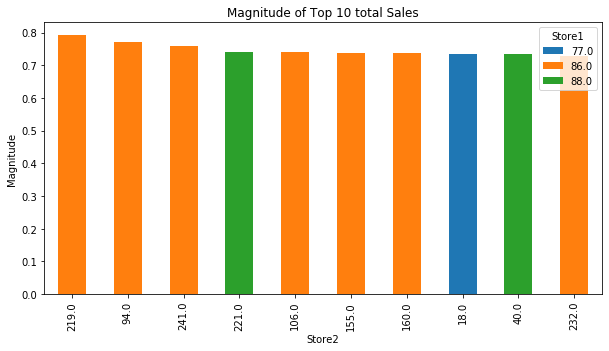

In [97]:
grp3.unstack().plot(kind='bar',stacked=True,title='Magnitude of Top 10 total Sales',figsize=(10,5))
plt.ylabel('Magnitude')
plt.show()

highest magnitude Stores are:
- trial store 77 with store 18, trial store 86 with store 219 & trial store 88 with 221,40 
also we can see that trial store 86 is having larger magnitude with most of the stores in top 10 entries

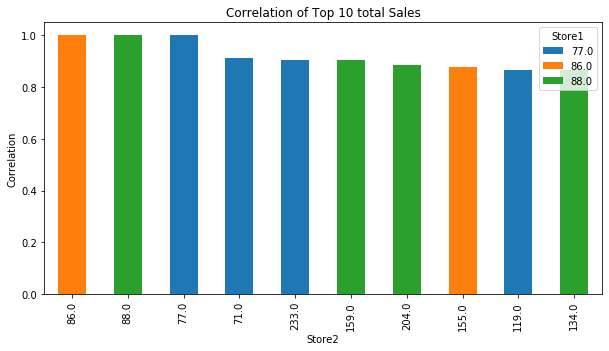

In [99]:
grp4=sale_score.groupby(['Store2','Store1']).Correlation.sum().sort_values(ascending=False)[0:10]
grp4.unstack().plot(kind='bar',stacked=True,title='Correlation of Top 10 total Sales',figsize=(10,5))
plt.ylabel('Correlation')
plt.show()

Highest correlated stores are:
- store 77 with 233 , store 86 with 155 only, store 88 with 159

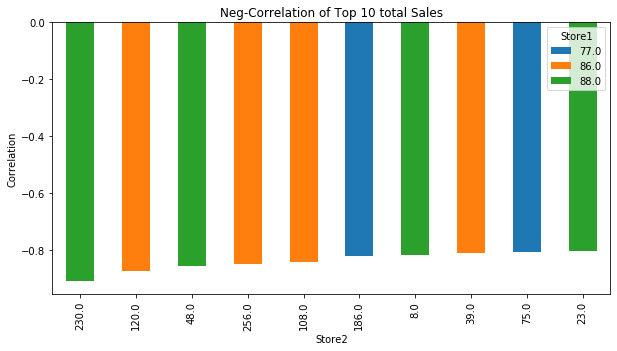

In [100]:
grp4=sale_score.groupby(['Store2','Store1']).Correlation.sum().sort_values(ascending=True)[0:10]
grp4.unstack().plot(kind='bar',stacked=True,title='Neg-Correlation of Top 10 total Sales',figsize=(10,5))
plt.ylabel('Correlation')
plt.show()

**Combined metric for Number of customer**

In [31]:
nCustomer_score = pd.DataFrame()
for trial_num in [77,86,88]:
    nCustomer_score = pd.concat([nCustomer_score,corr_dis(pre_trial,'nCustomers',trial_num)])
nCustomer_score.head()

,Store1,Store2,Correlation,Magnitude
0,77.0,1.0,0.322168,0.663866
1,77.0,2.0,-0.572051,0.471429
2,77.0,3.0,0.834207,0.489796
3,77.0,4.0,-0.295639,0.498258
4,77.0,5.0,0.370659,0.512605


In [101]:
grp1=nCustomer_score.groupby(['Store2','Store1']).Magnitude.sum().sort_values(ascending=False)[0:10]
grp1.unstack()

Store1,77.0,86.0,88.0
Store2,,,
219.0,NaN,0.768908,NaN
159.0,NaN,0.765306,NaN
166.0,NaN,NaN,0.763547
260.0,0.757764,NaN,NaN
236.0,NaN,NaN,0.741935
229.0,NaN,0.740260,NaN
64.0,0.740260,NaN,NaN
150.0,NaN,0.736842,NaN
48.0,0.730159,NaN,NaN


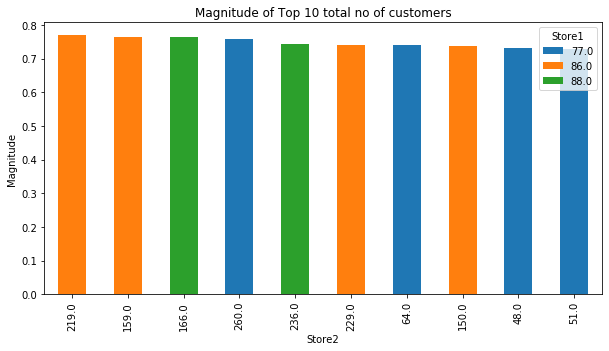

In [102]:
grp1.unstack().plot(kind='bar',stacked=True,title='Magnitude of Top 10 total no of customers',figsize=(10,5))
plt.ylabel('Magnitude')
plt.show()

Highest magnitude stores are:
- store 77 with 260,64 , store 86 with 219,159 , store 88 with 166,236

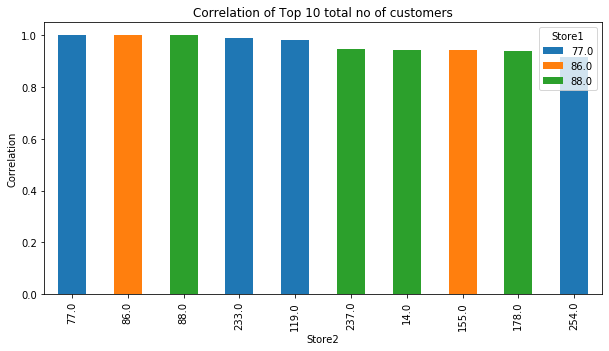

In [103]:
grp2=nCustomer_score.groupby(['Store2','Store1']).Correlation.sum().sort_values(ascending=False)[0:10]
grp2.unstack().plot(kind='bar',stacked=True,title='Correlation of Top 10 total no of customers',figsize=(10,5))
plt.ylabel('Correlation')
plt.show()

Highest correlated stores are:
- store 77 with 233, store 86 with 155, store 88 with 237   
    

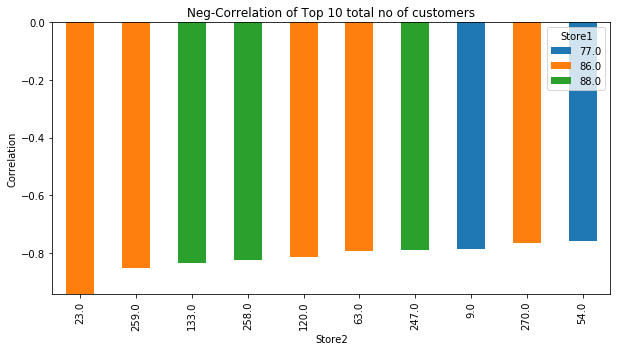

In [104]:
grp2=nCustomer_score.groupby(['Store2','Store1']).Correlation.sum().sort_values(ascending=True)[0:10]
grp2.unstack().plot(kind='bar',stacked=True,title='Neg-Correlation of Top 10 total no of customers',figsize=(10,5))
plt.ylabel('Correlation')
plt.show()

Highest correlated stores as per total sales and total customers are:
- store 77:233
- store 86:155
- store 88:237 & 159
- it is clear til now that store 77 is perfectly matched with 233 and store 86 with 155 but store 88 is having some trouble

**Adding new weighted score column in number of customer metric**

In [59]:
weight=0.5
nCustomer_score['Weighted_cust']=weight*nCustomer_score['Correlation'] + weight*nCustomer_score['Magnitude']
nCustomer_score.head()

,Store1,Store2,Correlation,Magnitude,Weighted_cust
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


**Adding new weighted score column in Total sale metric**

In [60]:
sale_score['Weighted_sale'] = weight*sale_score['Correlation']+weight*sale_score['Magnitude']
sale_score.head()

,Store1,Store2,Correlation,Magnitude,Weighted_sale
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


In [61]:
sale_score.set_index(['Store1','Store2'],inplace=True)
nCustomer_score.set_index(['Store1','Store2'],inplace=True)
score_control = pd.concat([sale_score['Weighted_sale'],nCustomer_score['Weighted_cust']],axis=1)
score_control.head()

Weighted_sale  Weighted_cust
Store1 Store2                              
77.0   1.0          0.241691       0.493017
       2.0          0.163520      -0.050311
       3.0          0.664779       0.662002
       4.0          0.190817       0.101310
       5.0          0.202834       0.441632

In [89]:
g = score_control.copy()
g.reset_index(inplace=True)
ws=g.groupby(['Store2','Store1']).Weighted_sale.sum().sort_values(ascending=False)[0:10]
ws.unstack()

Store1,77.0,86.0,88.0
Store2,,,
155.0,NaN,0.808106,NaN
71.0,0.789497,NaN,NaN
134.0,NaN,NaN,0.775084
106.0,NaN,0.708857,NaN
115.0,0.708347,NaN,NaN
204.0,NaN,NaN,0.697512
233.0,0.697290,NaN,NaN
109.0,NaN,0.697120,NaN
50.0,0.697113,NaN,NaN


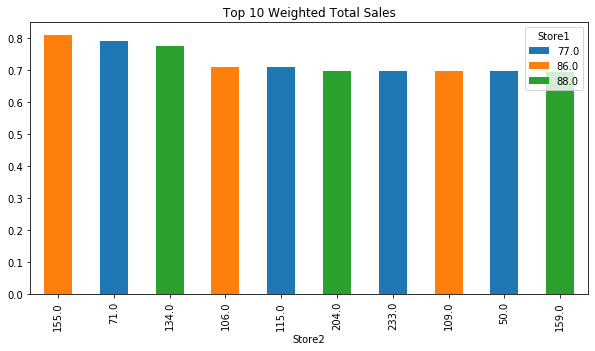

In [90]:
ws.unstack().plot(kind='bar',stacked=True,title='Top 10 Weighted Total Sales',figsize=(10,5))
plt.show()

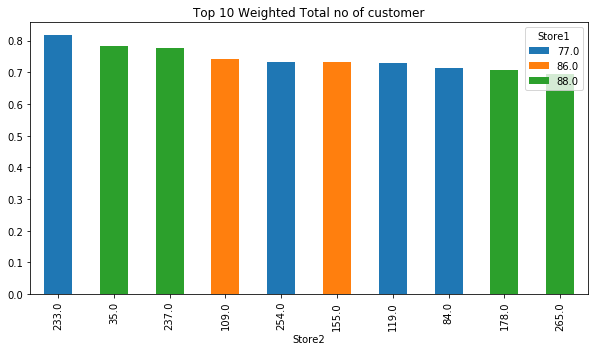

In [105]:
ws2=g.groupby(['Store2','Store1']).Weighted_cust.sum().sort_values(ascending=False)[0:10]
ws2.unstack().plot(kind='bar',stacked=True,title='Top 10 Weighted Total no of customer',figsize=(10,5))
plt.show()

**Now we have a score for each of total number of sales and number of customers.
Let's combine the two via a simple average.**

In [62]:
score_control['finalControlScore']=weight*score_control['Weighted_sale']+weight*score_control['Weighted_cust']
score_control.head()

Weighted_sale  Weighted_cust  finalControlScore
Store1 Store2                                                 
77.0   1.0          0.241691       0.493017           0.367354
       2.0          0.163520      -0.050311           0.056604
       3.0          0.664779       0.662002           0.663390
       4.0          0.190817       0.101310           0.146064
       5.0          0.202834       0.441632           0.322233

Top 10 finalControlScore values

In [85]:
ws3[0:10]

Store2  Store1
155.0   86.0      0.770724
233.0   77.0      0.756949
71.0    77.0      0.726310
109.0   86.0      0.719826
84.0    77.0      0.685986
119.0   77.0      0.682887
178.0   88.0      0.679316
115.0   77.0      0.676751
14.0    88.0      0.665919
50.0    77.0      0.665583
Name: finalControlScore, dtype: float64

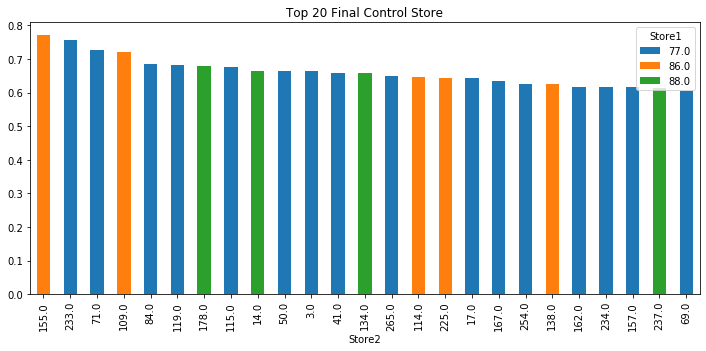

In [108]:
ws3=g.groupby(['Store2','Store1']).finalControlScore.sum().sort_values(ascending=False)[0:25]
ws3.unstack().plot(kind='bar',stacked=True,title='Top 20 Final Control Store',figsize=(12,5))
plt.show()

**The store with the highest score is then selected as the control store since it is most similar to the trial store.
Select control stores based on the highest matching store (closest to 1 but not the store itself, i.e. the second ranked highest store)**

## Selecting Trial Store  77
**Select the most appropriate control store for trial store 77 by finding the store with the highest final score.**

In [109]:
a=score_control.reset_index()

In [110]:
store77=a.loc[a.Store1==77,:]
store77.sort_values(by='finalControlScore',ascending=False)

,Store1,Store2,Weighted_sale,Weighted_cust,finalControlScore
221,77.0,233.0,0.697290,0.816607,0.756949
67,77.0,71.0,0.789497,0.663123,0.726310
79,77.0,84.0,0.656972,0.715000,0.685986
111,77.0,119.0,0.636046,0.729729,0.682887
108,77.0,115.0,0.708347,0.645155,0.676751
...,...,...,...,...,...
230,77.0,242.0,-0.121818,-0.046675,-0.084247
178,77.0,186.0,-0.128806,-0.057268,-0.093037
95,77.0,102.0,-0.102238,-0.119121,-0.110680
8,77.0,9.0,-0.144121,-0.087135,-0.115628


store 233 matches trial store 77 the most

**Now that we have found a control store, let's check visually if the drivers are
indeed similar in the period before the trial.**

In [36]:
control_store=233
trial_store = 77
pastSale = pre_trial
store_type=[]
for i in pastSale['STORE_NBR']:
    if i == control_store:
        store_type.append('Control')
    elif i == trial_store:
        store_type.append('Trial')
    else:
        store_type.append('Other')
        
pastSale['store_type']=store_type
pastSale.head()

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,STORE_NBR,MONTHID,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,store_type
0,1,201807,206.9,49,1.061224,1.265306,1.192308,3.337097,Other
1,1,201808,176.1,42,1.023810,1.285714,1.255814,3.261111,Other
2,1,201809,278.8,59,1.050847,1.271186,1.209677,3.717333,Other
3,1,201810,188.1,44,1.022727,1.318182,1.288889,3.243103,Other
4,1,201811,192.6,46,1.021739,1.239130,1.212766,3.378947,Other


In [37]:
pastSale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        1820 non-null   int64  
 1   MONTHID          1820 non-null   int64  
 2   TOT_SALES        1820 non-null   float64
 3   nCustomers       1820 non-null   int64  
 4   nTxnPerCust      1820 non-null   float64
 5   nChipsPerCust    1820 non-null   float64
 6   nChipsPerTxn     1820 non-null   float64
 7   avgPricePerUnit  1820 non-null   float64
 8   store_type       1820 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 142.2+ KB


**We'll look at total sales first Visual checks on trends based on the drivers**

In [38]:
pastSale['TransactionMonth'] = pd.to_datetime(pastSale['MONTHID'].astype(str), format='%Y%m')
controlsale = pastSale.loc[pastSale['store_type']=='Control',['TOT_SALES','TransactionMonth']].set_index('TransactionMonth')
controlsale = pd.DataFrame(controlsale.groupby('TransactionMonth').TOT_SALES.mean())
controlsale.rename(columns={'TOT_SALES':'Control Store'},inplace = True)
trialsale= pastSale.loc[pastSale['store_type']=='Trial',['TOT_SALES','TransactionMonth']].set_index('TransactionMonth')
trialsale = pd.DataFrame(trialsale.groupby('TransactionMonth').TOT_SALES.mean())
trialsale.rename(columns={'TOT_SALES':'Trial Store'},inplace = True)
othersale = pastSale.loc[pastSale['store_type']=='Other',['TOT_SALES','TransactionMonth']].set_index('TransactionMonth')
othersale = pd.DataFrame(othersale.groupby('TransactionMonth').TOT_SALES.mean())
othersale.rename(columns={'TOT_SALES':'Other Store'},inplace = True)


C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
print(controlsale.head())
print(trialsale.head())
print(othersale.head())

                  Control Store
TransactionMonth               
2018-07-01                290.7
2018-08-01                285.9
2018-09-01                228.6
2018-10-01                185.7
2018-11-01                211.6
                  Trial Store
TransactionMonth             
2018-07-01              296.8
2018-08-01              255.5
2018-09-01              225.2
2018-10-01              204.5
2018-11-01              245.3
                  Other Store
TransactionMonth             
2018-07-01         638.004651
2018-08-01         610.223450
2018-09-01         620.198450
2018-10-01         635.314729
2018-11-01         618.864341


In [40]:
combine_sale = pd.concat([controlsale,trialsale,othersale],axis=1)
combine_sale

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,290.7,296.8,638.004651
2018-08-01,285.9,255.5,610.223450
2018-09-01,228.6,225.2,620.198450
2018-10-01,185.7,204.5,635.314729
2018-11-01,211.6,245.3,618.864341
2018-12-01,279.8,267.3,648.453876
2019-01-01,177.5,204.4,628.684496


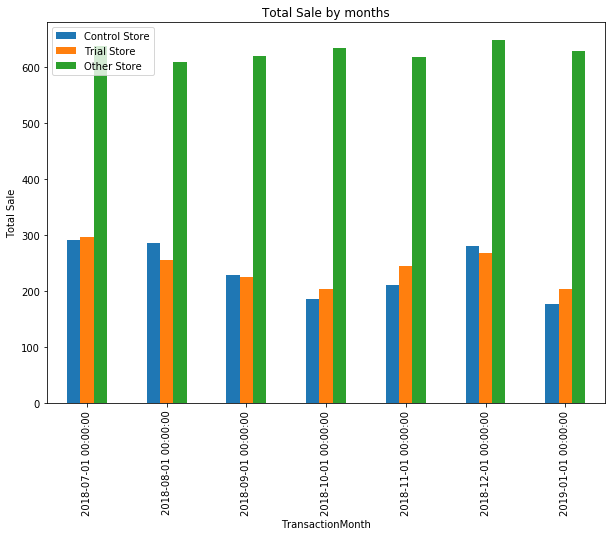

In [41]:

combine_sale.plot(kind='bar',figsize=(10,7))
plt.title('Total Sale by months')
plt.ylabel('Total Sale')
plt.show()

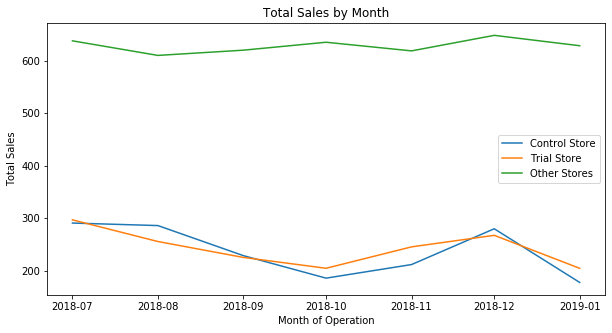

In [42]:
plt.figure(figsize = (10, 5))
plt.plot(combine_sale)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)
plt.show()

**Next, number of customers. Conduct visual checks on customer count trends by comparing the
trial store to the control store and other stores.**

In [43]:

controlcust = pastSale.loc[pastSale['store_type']=='Control',['nCustomers','TransactionMonth']].set_index('TransactionMonth')
controlcust = pd.DataFrame(controlcust.groupby('TransactionMonth').nCustomers.mean())
controlcust.rename(columns={'nCustomers':'Control Store'},inplace = True)
trialcust= pastSale.loc[pastSale['store_type']=='Trial',['nCustomers','TransactionMonth']].set_index('TransactionMonth')
trialcust = pd.DataFrame(trialcust.groupby('TransactionMonth').nCustomers.mean())
trialcust.rename(columns={'nCustomers':'Trial Store'},inplace = True)
othercust = pastSale.loc[pastSale['store_type']=='Other',['nCustomers','TransactionMonth']].set_index('TransactionMonth')
othercust = pd.DataFrame(othercust.groupby('TransactionMonth').nCustomers.mean())
othercust.rename(columns={'nCustomers':'Other Store'},inplace = True)

In [44]:
print(controlcust.head())
print(trialcust.head())
print(othercust.head())

                  Control Store
TransactionMonth               
2018-07-01                   51
2018-08-01                   48
2018-09-01                   42
2018-10-01                   35
2018-11-01                   40
                  Trial Store
TransactionMonth             
2018-07-01                 51
2018-08-01                 47
2018-09-01                 42
2018-10-01                 37
2018-11-01                 41
                  Other Store
TransactionMonth             
2018-07-01          72.333333
2018-08-01          72.120155
2018-09-01          70.131783
2018-10-01          71.608527
2018-11-01          70.534884


In [45]:
combine_cust = pd.concat([controlcust,trialcust,othercust],axis=1)
combine_cust.head()

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,51,51,72.333333
2018-08-01,48,47,72.120155
2018-09-01,42,42,70.131783
2018-10-01,35,37,71.608527
2018-11-01,40,41,70.534884


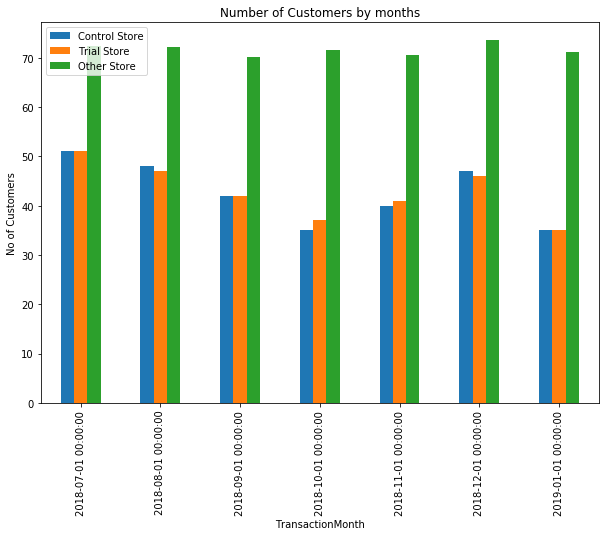

In [46]:
combine_cust.plot(kind='bar',figsize=(10,7))
plt.title('Number of Customers by months')
plt.ylabel('No of Customers')
plt.show()

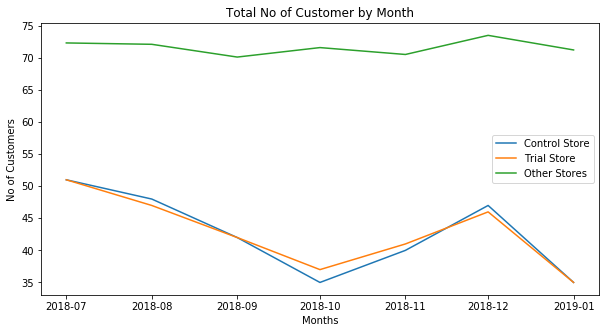

In [47]:
plt.figure(figsize = (10, 5))
plt.plot(combine_cust)
plt.title('Total No of Customer by Month')
plt.xlabel('Months')
plt.ylabel('No of Customers')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)
plt.show()

## Assessment of trial 77
The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.
We'll start with scaling the control store's sales to a level similar to control
for any differences between the two stores outside of the trial period.
Comparison of results during trial
#### Scale pre-trial control sales to match pre-trial trial store sales

We compute this by dividing sum of 'totSales' for trial store by sum of 'totSales' for control store

In [48]:
pre_trial.head()

,STORE_NBR,MONTHID,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,1.265306,1.192308,3.337097,Other,2018-07-01
1,1,201808,176.1,42,1.023810,1.285714,1.255814,3.261111,Other,2018-08-01
2,1,201809,278.8,59,1.050847,1.271186,1.209677,3.717333,Other,2018-09-01
3,1,201810,188.1,44,1.022727,1.318182,1.288889,3.243103,Other,2018-10-01
4,1,201811,192.6,46,1.021739,1.239130,1.212766,3.378947,Other,2018-11-01


In [49]:
pre_trial.shape

(1820, 10)

In [50]:
trialSale=pre_trial[pre_trial['store_type']=='Trial'].TOT_SALES.sum()
scalingFactorSale = trialSale/pre_trial[pre_trial['store_type']=='Control'].TOT_SALES.sum()
scalingFactorSale

1.023617303289553

#### Apply the scaling factor by multiplying it to total sale of control store using unfiltered monthly metric

In [51]:
monthly_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        3169 non-null   int64  
 1   MONTHID          3169 non-null   int64  
 2   TOT_SALES        3169 non-null   float64
 3   nCustomers       3169 non-null   int64  
 4   nTxnPerCust      3169 non-null   float64
 5   nChipsPerCust    3169 non-null   float64
 6   nChipsPerTxn     3169 non-null   float64
 7   avgPricePerUnit  3169 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 198.2 KB


In [52]:
scaledControlSales = monthly_metric.copy()
scaledControlSales = scaledControlSales[scaledControlSales['STORE_NBR']==control_store]# ie. 233
scaledControlSales['controlSales'] = scaledControlSales['TOT_SALES']*scalingFactorSale 
scaledControlSales.head()

,STORE_NBR,MONTHID,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
2699,233,201807,290.7,51,1.058824,1.725490,1.629630,3.303409,297.565550
2700,233,201808,285.9,48,1.041667,1.666667,1.600000,3.573750,292.652187
2701,233,201809,228.6,42,1.071429,1.666667,1.555556,3.265714,233.998916
2702,233,201810,185.7,35,1.028571,1.600000,1.555556,3.316071,190.085733
2703,233,201811,211.6,40,1.025000,1.550000,1.512195,3.412903,216.597421


In [55]:
scaledControlSales[['MONTHID','controlSales']]

,MONTHID,controlSales
2699,201807,297.565550
2700,201808,292.652187
2701,201809,233.998916
2702,201810,190.085733
2703,201811,216.597421
2704,201812,286.408121
2705,201901,181.692071
2706,201902,249.762622
2707,201903,203.802205
2708,201904,162.345704


Now that we have comparable sales figures for the control store, we can calculate
the percentage difference between the scaled control sales and the trial store's
sales during the trial period.
**Calculate the percentage difference between scaled control sales
and trial sales**

In [58]:
percentageDiff = scaledControlSales[['MONTHID','controlSales']].reset_index(drop=True)
trialsale=monthly_metric[monthly_metric['STORE_NBR']==77].TOT_SALES.reset_index(drop=True)
percentageDiff = pd.concat([percentageDiff ,trialsale],axis=1)
percentageDiff.rename(columns={'TOT_SALES':'trialSales'},inplace=True)
percentageDiff.head()

,MONTHID,controlSales,trialSales
0,201807,297.565550,296.8
1,201808,292.652187,255.5
2,201809,233.998916,225.2
3,201810,190.085733,204.5
4,201811,216.597421,245.3


In [59]:
percentageDiff['percentageDiff']=abs(percentageDiff['controlSales']-percentageDiff['trialSales'])/percentageDiff['controlSales']
percentageDiff

,MONTHID,controlSales,trialSales,percentageDiff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


#### As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

In [63]:
from statistics import stdev
stdDev =stdev(percentageDiff[percentageDiff['MONTHID']<201902].percentageDiff)
stdDev

0.049940762641425544

#### Define the degrees of freedom
Since we have 8 pre-trial months, dof = 8 - 1 = 7

#### We will test with a null hypothesis of there being 0 difference between trial and control stores. Calculate the t-values for the trial months. After that, find the 95th percentile of the t distribution with the appropriate degrees of freedom

to check whether the hypothesis is statistically significant.
The test statistic here is (x - u)/standard deviation

In [65]:
dof=7
percentageDiff['t_value']=(percentageDiff['percentageDiff']-0)/stdDev
percentageDiff[(percentageDiff['MONTHID']<201905) & (percentageDiff['MONTHID']>201901)][['MONTHID','t_value']]

,MONTHID,t_value
7,201902,1.183534
8,201903,7.339116
9,201904,12.476373


#### Find the 95th percentile of the t distribution with the appropriate  degrees of freedom to compare against


In [66]:
#Given a t-value and a degrees of freedom, you can use the "survival function" sf of scipy.stats.t (aka the complementary CDF) to compute the one-sided p-value. 
#The first argument is the T value, and the second is the degrees of freedom.
from scipy.stats import t
t.sf(1.183534,7)

0.13761373594675402

In [67]:
#we will use inverse survival function it takes probability and degree of freedom
t.isf(0.05,dof)
#we can calculate the critical values for the upper tail of the t distribution for different probabilities and degrees of freedom.

1.8945786050613054

We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March
and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the
control store.
Let’s create a more visual version of this by plotting the sales of the control store, the sales of the trial stores
and the 95th percentile value of sales of the control store.

In [70]:
percentageDiff

,MONTHID,controlSales,trialSales,percentageDiff,t_value
0,201807,297.565550,296.8,0.002573,0.051515
1,201808,292.652187,255.5,0.126950,2.542011
2,201809,233.998916,225.2,0.037602,0.752940
3,201810,190.085733,204.5,0.075830,1.518406
4,201811,216.597421,245.3,0.132516,2.653459
5,201812,286.408121,267.3,0.066716,1.335911
6,201901,181.692071,204.4,0.124980,2.502571
7,201902,249.762622,235.0,0.059107,1.183534
8,201903,203.802205,278.5,0.366521,7.339116
9,201904,162.345704,263.5,0.623080,12.476373


In [71]:
assessment = percentageDiff[['MONTHID','controlSales','trialSales']]
assessment['MONTHID']=pd.to_datetime(assessment['MONTHID'].astype(str),format='%Y%m')
assessment.set_index('MONTHID',inplace=True)
assessment

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,controlSales,trialSales
MONTHID,,
2018-07-01,297.565550,296.8
2018-08-01,292.652187,255.5
2018-09-01,233.998916,225.2
2018-10-01,190.085733,204.5
2018-11-01,216.597421,245.3
2018-12-01,286.408121,267.3
2019-01-01,181.692071,204.4
2019-02-01,249.762622,235.0
2019-03-01,203.802205,278.5


In [72]:
assessment['control-95% confidence interval']=assessment['controlSales']*(1+stdDev*2)
assessment['control-5% confidence interval']=assessment['controlSales']*(1-stdDev*2)
assessment

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,controlSales,trialSales,control-95% confidence interval,control-5% confidence interval
MONTHID,,,,
2018-07-01,297.565550,296.8,327.286851,267.844249
2018-08-01,292.652187,255.5,321.882734,263.421640
2018-09-01,233.998916,225.2,257.371084,210.626747
2018-10-01,190.085733,204.5,209.071786,171.099680
2018-11-01,216.597421,245.3,238.231502,194.963341
2018-12-01,286.408121,267.3,315.015001,257.801241
2019-01-01,181.692071,204.4,199.839753,163.544390
2019-02-01,249.762622,235.0,274.709294,224.815950
2019-03-01,203.802205,278.5,224.158280,183.446130


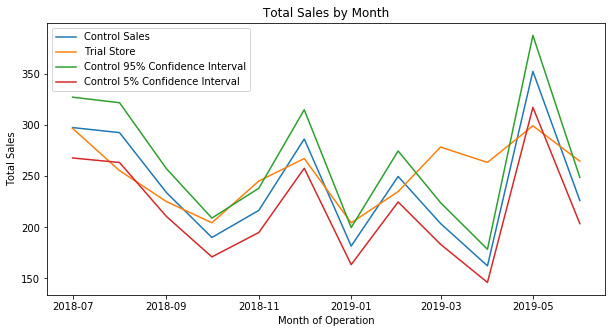

In [77]:
plt.figure(figsize=(10,5))
plt.plot(assessment)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

# Set legend
plt.legend(['Control Sales', 'Trial Store','Control 95% Confidence Interval', 'Control 5% Confidence Interval'], loc = 2)

plt.show()

**From feb to April**

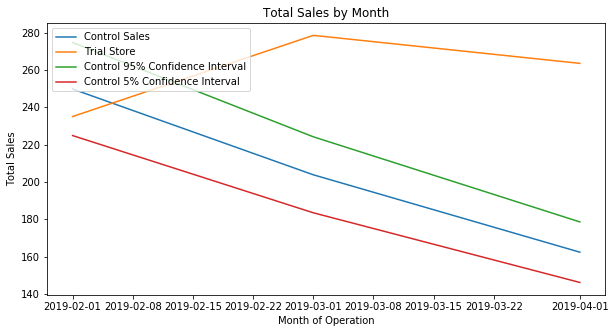

In [79]:
trialMonth=assessment[(assessment.index<'2019-05-01')&(assessment.index>'2019-01-01')]
plt.figure(figsize=(10,5))
plt.plot(trialMonth)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Sales', 'Trial Store','Control 95% Confidence Interval', 'Control 5% Confidence Interval'], loc = 2)

plt.show()

The results show that the trial in store 77 is significantly different to its control store in the trial period as
the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the
three trial months.
- **Let’s have a look at assessing this for number of customers as well.**

In [82]:
pre_trial.head()

,STORE_NBR,MONTHID,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,1.265306,1.192308,3.337097,Other,2018-07-01
1,1,201808,176.1,42,1.023810,1.285714,1.255814,3.261111,Other,2018-08-01
2,1,201809,278.8,59,1.050847,1.271186,1.209677,3.717333,Other,2018-09-01
3,1,201810,188.1,44,1.022727,1.318182,1.288889,3.243103,Other,2018-10-01
4,1,201811,192.6,46,1.021739,1.239130,1.212766,3.378947,Other,2018-11-01


In [83]:
trialcust=pre_trial[pre_trial['store_type']=='Trial'].nCustomers.sum()
scalingFactorcust = trialcust/pre_trial[pre_trial['store_type']=='Control'].nCustomers.sum()

scaledControlcust = monthly_metric.copy()
scaledControlcust = scaledControlcust[scaledControlcust['STORE_NBR']==control_store]# ie. 233
scaledControlcust['controlCust'] = scaledControlcust['nCustomers']*scalingFactorcust 

percentageDiff2 = scaledControlcust[['MONTHID','controlCust']].reset_index(drop=True)
trialCust=monthly_metric[monthly_metric['STORE_NBR']==77].nCustomers.reset_index(drop=True)
percentageDiff2 = pd.concat([percentageDiff2 ,trialCust],axis=1)
percentageDiff2.rename(columns={'nCustomers':'trialCust'},inplace=True)

percentageDiff2['percentageDiff']=abs(percentageDiff2['controlCust']-percentageDiff2['trialCust'])/percentageDiff2['controlCust']

stdDev2 =stdev(percentageDiff2[percentageDiff2['MONTHID']<201902].percentageDiff)

dof=7


In [86]:
stdDev2

0.018240748558243945

In [85]:
percentageDiff2

,MONTHID,controlCust,trialCust,percentageDiff
0,201807,51.171141,51,0.003344
1,201808,48.161074,47,0.024108
2,201809,42.140940,42,0.003344
3,201810,35.117450,37,0.053607
4,201811,40.134228,41,0.021572
5,201812,47.157718,46,0.024550
6,201901,35.117450,35,0.003344
7,201902,45.151007,45,0.003344
8,201903,40.134228,50,0.245819
9,201904,30.100671,47,0.561427


In [87]:
assessment2 = percentageDiff2[['MONTHID','controlCust','trialCust']]
assessment2['MONTHID']=pd.to_datetime(assessment2['MONTHID'].astype(str),format='%Y%m')
assessment2.set_index('MONTHID',inplace=True)

assessment2['control-95% confidence interval']=assessment2['controlCust']*(1+stdDev2*2)
assessment2['control-5% confidence interval']=assessment2['controlCust']*(1-stdDev2*2)
assessment2

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,controlCust,trialCust,control-95% confidence interval,control-5% confidence interval
MONTHID,,,,
2018-07-01,51.171141,51,53.037941,49.304341
2018-08-01,48.161074,47,49.918062,46.404086
2018-09-01,42.140940,42,43.678304,40.603575
2018-10-01,35.117450,37,36.398587,33.836313
2018-11-01,40.134228,41,41.598385,38.670071
2018-12-01,47.157718,46,48.878102,45.437334
2019-01-01,35.117450,35,36.398587,33.836313
2019-02-01,45.151007,45,46.798183,43.503830
2019-03-01,40.134228,50,41.598385,38.670071


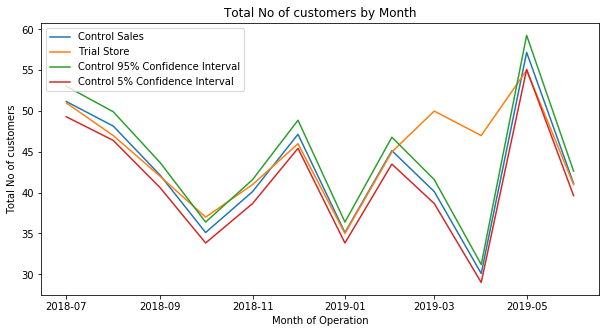

In [88]:
plt.figure(figsize=(10,5))
plt.plot(assessment2)
plt.title('Total No of customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total No of customers')

# Set legend
plt.legend(['Control Sales', 'Trial Store','Control 95% Confidence Interval', 'Control 5% Confidence Interval'], loc = 2)

plt.show()

Let’s repeat finding the control store and assessing the impact of the trial for each of the other two trial stores.
## Selecting Trial store 86

In [91]:
store86=a.loc[a.Store1==86,:]
store86.sort_values(by='finalControlScore',ascending=False)

,Store1,Store2,Weighted_sale,Weighted_cust,finalControlScore
407,86.0,155.0,0.808106,0.733343,0.770724
362,86.0,109.0,0.697120,0.742532,0.719826
367,86.0,114.0,0.631393,0.663384,0.647389
473,86.0,225.0,0.601841,0.684356,0.643099
390,86.0,138.0,0.593296,0.660565,0.626930
...,...,...,...,...,...
361,86.0,108.0,-0.221047,-0.081341,-0.151194
437,86.0,185.0,-0.215914,-0.144274,-0.180094
281,86.0,23.0,-0.209267,-0.164637,-0.186952
372,86.0,120.0,-0.250917,-0.164042,-0.207479


Looks like store 155 will be a control store for trial store 86. Again, let’s check visually if the drivers are
indeed similar in the period before the trial.
- **We’ll look at total sales first.**


In [92]:
control_store=155
trial_store = 86
pastSale = pre_trial
store_type=[]
for i in pastSale['STORE_NBR']:
    if i == control_store:
        store_type.append('Control')
    elif i == trial_store:
        store_type.append('Trial')
    else:
        store_type.append('Other')
        
pastSale['store_type']=store_type
pastSale.head()
pastSale['TransactionMonth'] = pd.to_datetime(pastSale['MONTHID'].astype(str), format='%Y%m')
controlsale = pastSale.loc[pastSale['store_type']=='Control',['TOT_SALES','TransactionMonth']].set_index('TransactionMonth')
controlsale = pd.DataFrame(controlsale.groupby('TransactionMonth').TOT_SALES.mean())
controlsale.rename(columns={'TOT_SALES':'Control Store'},inplace = True)
trialsale= pastSale.loc[pastSale['store_type']=='Trial',['TOT_SALES','TransactionMonth']].set_index('TransactionMonth')
trialsale = pd.DataFrame(trialsale.groupby('TransactionMonth').TOT_SALES.mean())
trialsale.rename(columns={'TOT_SALES':'Trial Store'},inplace = True)
othersale = pastSale.loc[pastSale['store_type']=='Other',['TOT_SALES','TransactionMonth']].set_index('TransactionMonth')
othersale = pd.DataFrame(othersale.groupby('TransactionMonth').TOT_SALES.mean())
othersale.rename(columns={'TOT_SALES':'Other Store'},inplace = True)
combine_sale = pd.concat([controlsale,trialsale,othersale],axis=1)
combine_sale

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,924.6,892.20,633.239922
2018-08-01,782.7,764.05,606.326744
2018-09-01,1014.4,914.60,614.480620
2018-10-01,963.8,948.40,629.415504
2018-11-01,898.8,918.00,613.593411
2018-12-01,849.8,841.20,644.020155
2019-01-01,874.6,841.40,623.513566


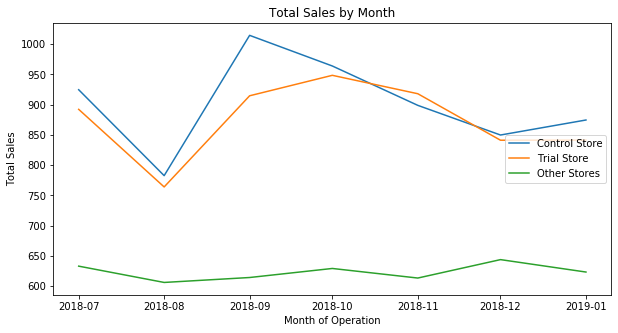

In [93]:
plt.figure(figsize = (10, 5))
plt.plot(combine_sale)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)
plt.show()

**Great, sales are trending in a similar way.
Next, number of customers**

In [94]:
controlcust = pastSale.loc[pastSale['store_type']=='Control',['nCustomers','TransactionMonth']].set_index('TransactionMonth')
controlcust = pd.DataFrame(controlcust.groupby('TransactionMonth').nCustomers.mean())
controlcust.rename(columns={'nCustomers':'Control Store'},inplace = True)
trialcust= pastSale.loc[pastSale['store_type']=='Trial',['nCustomers','TransactionMonth']].set_index('TransactionMonth')
trialcust = pd.DataFrame(trialcust.groupby('TransactionMonth').nCustomers.mean())
trialcust.rename(columns={'nCustomers':'Trial Store'},inplace = True)
othercust = pastSale.loc[pastSale['store_type']=='Other',['nCustomers','TransactionMonth']].set_index('TransactionMonth')
othercust = pd.DataFrame(othercust.groupby('TransactionMonth').nCustomers.mean())
othercust.rename(columns={'nCustomers':'Other Store'},inplace = True)
combine_cust = pd.concat([controlcust,trialcust,othercust],axis=1)
combine_cust.head()

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,101,99,71.953488
2018-08-01,91,94,71.771318
2018-09-01,103,103,69.658915
2018-10-01,108,109,71.046512
2018-11-01,101,100,70.069767


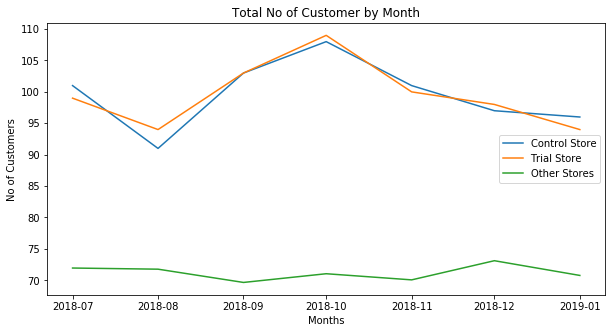

In [95]:
plt.figure(figsize = (10, 5))
plt.plot(combine_cust)
plt.title('Total No of Customer by Month')
plt.xlabel('Months')
plt.ylabel('No of Customers')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)
plt.show()

## Assessment for Trial store 86

**Let’s now assess the impact of the trial on sales**

In [96]:
trialSale=pre_trial[pre_trial['store_type']=='Trial'].TOT_SALES.sum()
scalingFactorSale = trialSale/pre_trial[pre_trial['store_type']=='Control'].TOT_SALES.sum()
scalingFactorSale

0.9700651481287746

**Apply the scaling factor by multiplying it to total sale of control store using unfiltered monthly metric**

In [97]:
scaledControlSales = monthly_metric.copy()
scaledControlSales = scaledControlSales[scaledControlSales['STORE_NBR']==control_store]# ie. 155
scaledControlSales['controlSales'] = scaledControlSales['TOT_SALES']*scalingFactorSale 
scaledControlSales.head()

,STORE_NBR,MONTHID,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
1793,155,201807,924.6,101,1.217822,2.475248,2.032520,3.698400,896.922236
1794,155,201808,782.7,91,1.307692,2.516484,1.924370,3.417904,759.269991
1795,155,201809,1014.4,103,1.398058,2.815534,2.013889,3.497931,984.034086
1796,155,201810,963.8,108,1.259259,2.518519,2.000000,3.543382,934.948790
1797,155,201811,898.8,101,1.316832,2.673267,2.030075,3.328889,871.894555


Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period. Calculate the percentage difference between scaled control sales and trial sales

In [99]:
percentageDiff = scaledControlSales[['MONTHID','controlSales']].reset_index(drop=True)
trialsale=monthly_metric[monthly_metric['STORE_NBR']==trial_store].TOT_SALES.reset_index(drop=True)
percentageDiff = pd.concat([percentageDiff ,trialsale],axis=1)
percentageDiff.rename(columns={'TOT_SALES':'trialSales'},inplace=True)
percentageDiff.head()
percentageDiff['percentageDiff']=abs(percentageDiff['controlSales']-percentageDiff['trialSales'])/percentageDiff['controlSales']
percentageDiff

,MONTHID,controlSales,trialSales,percentageDiff
0,201807,896.922236,892.20,0.005265
1,201808,759.269991,764.05,0.006296
2,201809,984.034086,914.60,0.070561
3,201810,934.948790,948.40,0.014387
4,201811,871.894555,918.00,0.052880
5,201812,824.361363,841.20,0.020426
6,201901,848.418979,841.40,0.008273
7,201902,864.522060,913.20,0.056306
8,201903,780.320405,1026.80,0.315870
9,201904,819.317024,848.20,0.035253


As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

In [100]:
from statistics import stdev
stdDev =stdev(percentageDiff[percentageDiff['MONTHID']<201902].percentageDiff)
stdDev

0.025833952854772586

We will test with a null hypothesis of there being 0 difference between trial and control stores. Calculate the t-values for the trial months. After that, find the 95th percentile of the t distribution with the appropriate degrees of freedom

**Find the 95th percentile of the t distribution with the appropriate degrees of freedom to compare against**

In [102]:
#we will use inverse survival function it takes probability and degree of freedom
t.isf(0.05,dof)

1.8945786050613054

In [103]:
dof=7
percentageDiff['t_value']=(percentageDiff['percentageDiff']-0)/stdDev
percentageDiff[(percentageDiff['MONTHID']<201905) & (percentageDiff['MONTHID']>201901)][['MONTHID','t_value']]

,MONTHID,t_value
7,201902,2.179542
8,201903,12.226922
9,201904,1.364580


We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March - i.e. the increase in sales in the trial store in March  is statistically greater than in the control store. Let’s create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

In [105]:
assessment = percentageDiff[['MONTHID','controlSales','trialSales']]
assessment['MONTHID']=pd.to_datetime(assessment['MONTHID'].astype(str),format='%Y%m')
assessment.set_index('MONTHID',inplace=True)

assessment['control-95% confidence interval']=assessment['controlSales']*(1+stdDev*2)
assessment['control-5% confidence interval']=assessment['controlSales']*(1-stdDev*2)
assessment

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,controlSales,trialSales,control-95% confidence interval,control-5% confidence interval
MONTHID,,,,
2018-07-01,896.922236,892.20,943.264329,850.580142
2018-08-01,759.269991,764.05,798.499882,720.040101
2018-09-01,984.034086,914.60,1034.877067,933.191106
2018-10-01,934.948790,948.40,983.255636,886.641944
2018-11-01,871.894555,918.00,916.943521,826.845589
2018-12-01,824.361363,841.20,866.954388,781.768338
2019-01-01,848.418979,841.40,892.255010,804.582947
2019-02-01,864.522060,913.20,909.190104,819.854016
2019-03-01,780.320405,1026.80,820.637926,740.002884


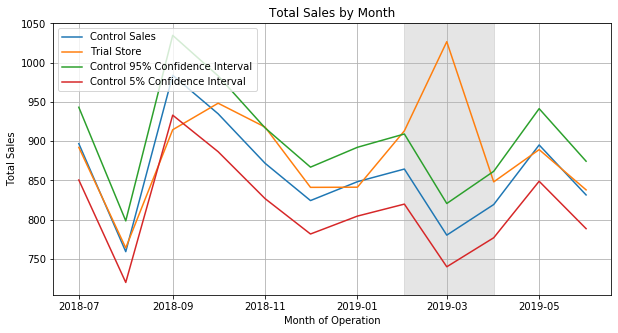

In [108]:
import matplotlib.dates as mdates

plt.figure(figsize=(10,5))
plt.plot(assessment)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

# Set legend
plt.legend(['Control Sales', 'Trial Store','Control 95% Confidence Interval', 'Control 5% Confidence Interval'], loc = 2)
# Set new y-axis limit


# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

The results show that the trial in store 86 is not significantly different to its control store in the trial period
as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the
three trial months.
- **Let’s have a look at assessing this for number of customers as well.**

In [109]:
trialcust=pre_trial[pre_trial['store_type']=='Trial'].nCustomers.sum()
scalingFactorcust = trialcust/pre_trial[pre_trial['store_type']=='Control'].nCustomers.sum()

scaledControlcust = monthly_metric.copy()
scaledControlcust = scaledControlcust[scaledControlcust['STORE_NBR']==control_store]# ie. 155
scaledControlcust['controlCust'] = scaledControlcust['nCustomers']*scalingFactorcust 

percentageDiff2 = scaledControlcust[['MONTHID','controlCust']].reset_index(drop=True)
trialCust=monthly_metric[monthly_metric['STORE_NBR']==trial_store].nCustomers.reset_index(drop=True)
percentageDiff2 = pd.concat([percentageDiff2 ,trialCust],axis=1)
percentageDiff2.rename(columns={'nCustomers':'trialCust'},inplace=True)

percentageDiff2['percentageDiff']=abs(percentageDiff2['controlCust']-percentageDiff2['trialCust'])/percentageDiff2['controlCust']

stdDev2 =stdev(percentageDiff2[percentageDiff2['MONTHID']<201902].percentageDiff)

dof=7

In [110]:
percentageDiff2

,MONTHID,controlCust,trialCust,percentageDiff
0,201807,101.0,99,0.019802
1,201808,91.0,94,0.032967
2,201809,103.0,103,0.000000
3,201810,108.0,109,0.009259
4,201811,101.0,100,0.009901
5,201812,97.0,98,0.010309
6,201901,96.0,94,0.020833
7,201902,95.0,107,0.126316
8,201903,94.0,115,0.223404
9,201904,99.0,105,0.060606


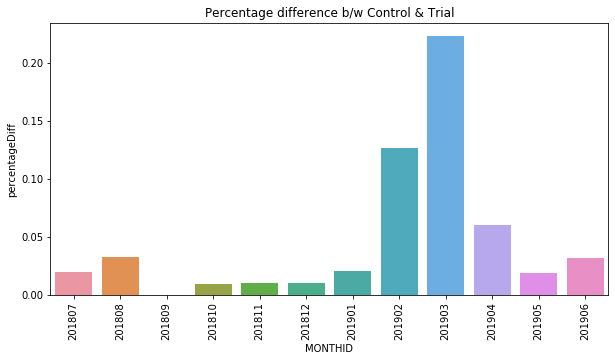

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(x=percentageDiff2.MONTHID,y=percentageDiff2.percentageDiff)
plt.xticks(rotation=90)
plt.title('Percentage difference b/w Control & Trial')
plt.show()

Highest difference between Control and Trial Store can be seen in **March 2019**.

In [111]:
assessment2 = percentageDiff2[['MONTHID','controlCust','trialCust']]
assessment2['MONTHID']=pd.to_datetime(assessment2['MONTHID'].astype(str),format='%Y%m')
assessment2.set_index('MONTHID',inplace=True)

assessment2['control-95% confidence interval']=assessment2['controlCust']*(1+stdDev2*2)
assessment2['control-5% confidence interval']=assessment2['controlCust']*(1-stdDev2*2)
assessment2

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,controlCust,trialCust,control-95% confidence interval,control-5% confidence interval
MONTHID,,,,
2018-07-01,101.0,99,103.158864,98.841136
2018-08-01,91.0,94,92.945115,89.054885
2018-09-01,103.0,103,105.201614,100.798386
2018-10-01,108.0,109,110.308488,105.691512
2018-11-01,101.0,100,103.158864,98.841136
2018-12-01,97.0,98,99.073364,94.926636
2019-01-01,96.0,94,98.051989,93.948011
2019-02-01,95.0,107,97.030614,92.969386
2019-03-01,94.0,115,96.009240,91.990760


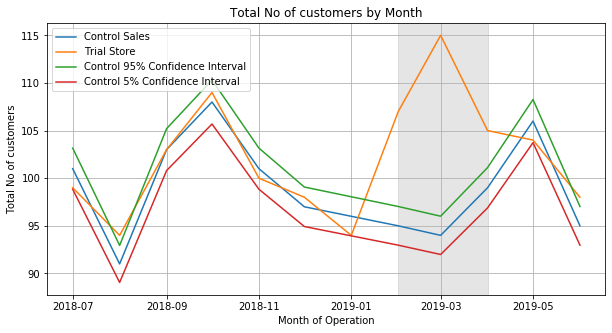

In [112]:
plt.figure(figsize=(10,5))
plt.plot(assessment2)
plt.title('Total No of customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total No of customers')

# Set legend
plt.legend(['Control Sales', 'Trial Store','Control 95% Confidence Interval', 'Control 5% Confidence Interval'], loc = 2)
# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)
plt.grid()
plt.show()

It looks like the number of customers is significantly higher in all of the three months. This seems to
suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but
as we saw, sales were not significantly higher. We should check with the Category Manager if there were
special deals in the trial store that were may have resulted in lower prices, impacting the results

## Selecting Trial store 88

In [122]:
store88=a.loc[a.Store1==88,:]
store88.sort_values(by='finalControlScore',ascending=False)[0:5]

,Store1,Store2,Weighted_sale,Weighted_cust,finalControlScore
690,88.0,178.0,0.650803,0.707828,0.679316
532,88.0,14.0,0.646064,0.685774,0.665919
646,88.0,134.0,0.775084,0.540154,0.657619
745,88.0,237.0,0.451974,0.777235,0.614604
699,88.0,187.0,0.616752,0.594560,0.605656


In [124]:
store88.sort_values(by='Weighted_cust',ascending=False)[0:5]

,Store1,Store2,Weighted_sale,Weighted_cust,finalControlScore
552,88.0,35.0,0.402499,0.783130,0.592814
745,88.0,237.0,0.451974,0.777235,0.614604
690,88.0,178.0,0.650803,0.707828,0.679316
772,88.0,265.0,0.254262,0.693234,0.473748
558,88.0,41.0,0.426524,0.686222,0.556373


We’ve now found store 237 to be a suitable control store for trial store 88.
Again, let’s check visually if the drivers are indeed similar in the period before the trial.
- **We’ll look at total sales first**

In [125]:
control_store=237
trial_store = 88
pastSale = pre_trial
store_type=[]
for i in pastSale['STORE_NBR']:
    if i == control_store:
        store_type.append('Control')
    elif i == trial_store:
        store_type.append('Trial')
    else:
        store_type.append('Other')
        
pastSale['store_type']=store_type
pastSale.head()
pastSale['TransactionMonth'] = pd.to_datetime(pastSale['MONTHID'].astype(str), format='%Y%m')
controlsale = pastSale.loc[pastSale['store_type']=='Control',['TOT_SALES','TransactionMonth']].set_index('TransactionMonth')
controlsale = pd.DataFrame(controlsale.groupby('TransactionMonth').TOT_SALES.mean())
controlsale.rename(columns={'TOT_SALES':'Control Store'},inplace = True)
trialsale= pastSale.loc[pastSale['store_type']=='Trial',['TOT_SALES','TransactionMonth']].set_index('TransactionMonth')
trialsale = pd.DataFrame(trialsale.groupby('TransactionMonth').TOT_SALES.mean())
trialsale.rename(columns={'TOT_SALES':'Trial Store'},inplace = True)
othersale = pastSale.loc[pastSale['store_type']=='Other',['TOT_SALES','TransactionMonth']].set_index('TransactionMonth')
othersale = pd.DataFrame(othersale.groupby('TransactionMonth').TOT_SALES.mean())
othersale.rename(columns={'TOT_SALES':'Other Store'},inplace = True)
combine_sale = pd.concat([controlsale,trialsale,othersale],axis=1)
combine_sale

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,1448.4,1310.0,629.590310
2018-08-01,1367.8,1323.8,601.889341
2018-09-01,1322.2,1423.0,611.317054
2018-10-01,1348.3,1352.4,626.359302
2018-11-01,1397.6,1382.8,609.858527
2018-12-01,1265.0,1325.2,640.534884
2019-01-01,1219.7,1266.4,620.528682


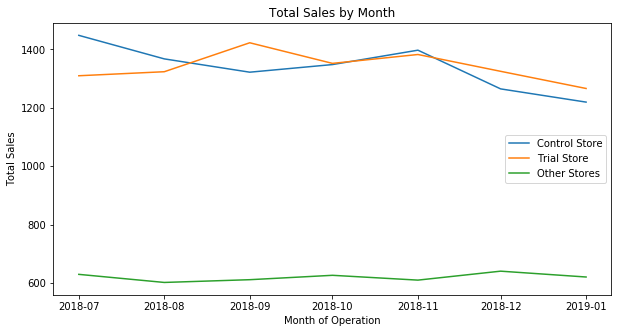

In [126]:
plt.figure(figsize = (10, 5))
plt.plot(combine_sale)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)
plt.show()

**Great, the trial and control stores have similar total sales.
Next, number of customers.**

In [127]:
controlcust = pastSale.loc[pastSale['store_type']=='Control',['nCustomers','TransactionMonth']].set_index('TransactionMonth')
controlcust = pd.DataFrame(controlcust.groupby('TransactionMonth').nCustomers.mean())
controlcust.rename(columns={'nCustomers':'Control Store'},inplace = True)
trialcust= pastSale.loc[pastSale['store_type']=='Trial',['nCustomers','TransactionMonth']].set_index('TransactionMonth')
trialcust = pd.DataFrame(trialcust.groupby('TransactionMonth').nCustomers.mean())
trialcust.rename(columns={'nCustomers':'Trial Store'},inplace = True)
othercust = pastSale.loc[pastSale['store_type']=='Other',['nCustomers','TransactionMonth']].set_index('TransactionMonth')
othercust = pd.DataFrame(othercust.groupby('TransactionMonth').nCustomers.mean())
othercust.rename(columns={'nCustomers':'Other Store'},inplace = True)
combine_cust = pd.concat([controlcust,trialcust,othercust],axis=1)
combine_cust.head()

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,128,129,71.732558
2018-08-01,135,131,71.457364
2018-09-01,126,124,69.488372
2018-10-01,123,123,70.934109
2018-11-01,132,130,69.833333


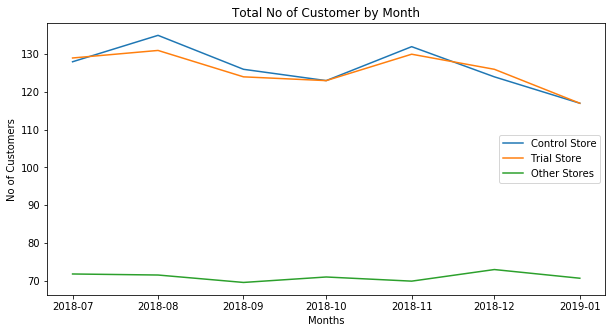

In [128]:
plt.figure(figsize = (10, 5))
plt.plot(combine_cust)
plt.title('Total No of Customer by Month')
plt.xlabel('Months')
plt.ylabel('No of Customers')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)
plt.show()

**Total number of customers of the control and trial stores are also similar.
Let’s now assess the impact of the trial on sales.**

## Assessment of trial store 88

In [129]:
trialSale=pre_trial[pre_trial['store_type']=='Trial'].TOT_SALES.sum()
scalingFactorSale = trialSale/pre_trial[pre_trial['store_type']=='Control'].TOT_SALES.sum()
scalingFactorSale

1.0015583306649594

Apply the scaling factor by multiplying it to total sale of control store using unfiltered monthly metric

In [130]:
scaledControlSales = monthly_metric.copy()
scaledControlSales = scaledControlSales[scaledControlSales['STORE_NBR']==control_store]# ie. 237
scaledControlSales['controlSales'] = scaledControlSales['TOT_SALES']*scalingFactorSale 
scaledControlSales.head()

,STORE_NBR,MONTHID,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
2747,237,201807,1448.4,128,1.265625,2.531250,2.000000,4.470370,1450.657086
2748,237,201808,1367.8,135,1.222222,2.318519,1.896970,4.369968,1369.931485
2749,237,201809,1322.2,126,1.182540,2.373016,2.006711,4.422074,1324.260425
2750,237,201810,1348.3,123,1.195122,2.430894,2.034014,4.509365,1350.401097
2751,237,201811,1397.6,132,1.219697,2.424242,1.987578,4.367500,1399.777923


In [131]:
percentageDiff = scaledControlSales[['MONTHID','controlSales']].reset_index(drop=True)
trialsale=monthly_metric[monthly_metric['STORE_NBR']==trial_store].TOT_SALES.reset_index(drop=True)
percentageDiff = pd.concat([percentageDiff ,trialsale],axis=1)
percentageDiff.rename(columns={'TOT_SALES':'trialSales'},inplace=True)
percentageDiff.head()
percentageDiff['percentageDiff']=abs(percentageDiff['controlSales']-percentageDiff['trialSales'])/percentageDiff['controlSales']
percentageDiff

,MONTHID,controlSales,trialSales,percentageDiff
0,201807,1450.657086,1310.00,0.096961
1,201808,1369.931485,1323.80,0.033674
2,201809,1324.260425,1423.00,0.074562
3,201810,1350.401097,1352.40,0.001480
4,201811,1399.777923,1382.80,0.012129
5,201812,1266.971288,1325.20,0.045959
6,201901,1221.600696,1266.40,0.036673
7,201902,1406.989143,1370.20,0.026147
8,201903,1210.082775,1477.20,0.220743
9,201904,1206.477165,1439.40,0.193060


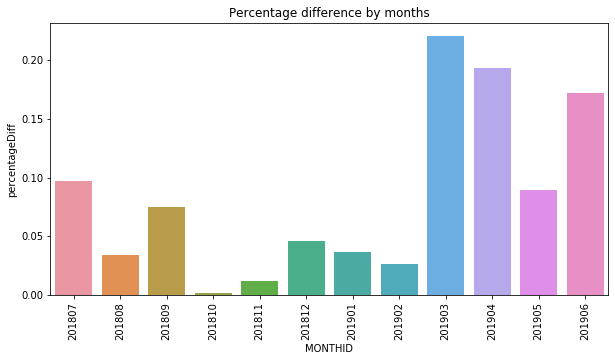

In [138]:
plt.figure(figsize=(10,5))
sns.barplot(x=percentageDiff.MONTHID,y=percentageDiff.percentageDiff)
plt.xticks(rotation=90)
plt.title('Percentage difference by months')
plt.show()

Highest difference can be seen in the months of March and April

In [132]:
from statistics import stdev
stdDev =stdev(percentageDiff[percentageDiff['MONTHID']<201902].percentageDiff)
stdDev

0.03346786730307888

In [133]:
t.isf(0.05,dof)

1.8945786050613054

In [134]:
dof=7
percentageDiff['t_value']=(percentageDiff['percentageDiff']-0)/stdDev
percentageDiff[(percentageDiff['MONTHID']<201905) & (percentageDiff['MONTHID']>201901)][['MONTHID','t_value']]

,MONTHID,t_value
7,201902,0.781270
8,201903,6.595668
9,201904,5.768527


t_value is much higher than the 95% distribution in march and april

In [135]:
assessment = percentageDiff[['MONTHID','controlSales','trialSales']]
assessment['MONTHID']=pd.to_datetime(assessment['MONTHID'].astype(str),format='%Y%m')
assessment.set_index('MONTHID',inplace=True)

assessment['control-95% confidence interval']=assessment['controlSales']*(1+stdDev*2)
assessment['control-5% confidence interval']=assessment['controlSales']*(1-stdDev*2)
assessment

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,controlSales,trialSales,control-95% confidence interval,control-5% confidence interval
MONTHID,,,,
2018-07-01,1450.657086,1310.00,1547.757884,1353.556288
2018-08-01,1369.931485,1323.80,1461.628855,1278.234114
2018-09-01,1324.260425,1423.00,1412.900769,1235.620080
2018-10-01,1350.401097,1352.40,1440.791187,1260.011008
2018-11-01,1399.777923,1382.80,1493.473086,1306.082759
2018-12-01,1266.971288,1325.20,1351.776942,1182.165634
2019-01-01,1221.600696,1266.40,1303.369436,1139.831956
2019-02-01,1406.989143,1370.20,1501.166995,1312.811291
2019-03-01,1210.082775,1477.20,1291.080555,1129.084996


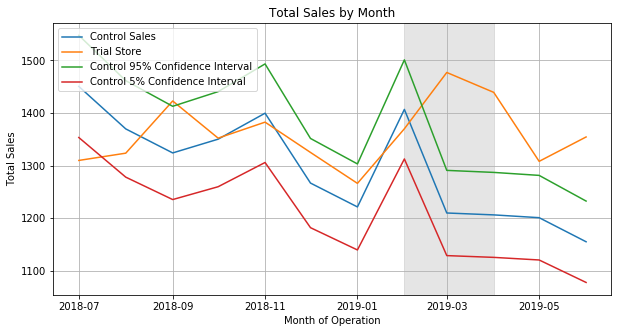

In [136]:
import matplotlib.dates as mdates

plt.figure(figsize=(10,5))
plt.plot(assessment)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

# Set legend
plt.legend(['Control Sales', 'Trial Store','Control 95% Confidence Interval', 'Control 5% Confidence Interval'], loc = 2)
# Set new y-axis limit


# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

The results show that the trial in store 88 is significantly different to its control store in the trial period as the
trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the
three trial months.
- **Let’s have a look at assessing this for number of customers as well.**

In [139]:
trialcust=pre_trial[pre_trial['store_type']=='Trial'].nCustomers.sum()
scalingFactorcust = trialcust/pre_trial[pre_trial['store_type']=='Control'].nCustomers.sum()

scaledControlcust = monthly_metric.copy()
scaledControlcust = scaledControlcust[scaledControlcust['STORE_NBR']==control_store]# ie. 237
scaledControlcust['controlCust'] = scaledControlcust['nCustomers']*scalingFactorcust 

percentageDiff2 = scaledControlcust[['MONTHID','controlCust']].reset_index(drop=True)
trialCust=monthly_metric[monthly_metric['STORE_NBR']==trial_store].nCustomers.reset_index(drop=True)
percentageDiff2 = pd.concat([percentageDiff2 ,trialCust],axis=1)
percentageDiff2.rename(columns={'nCustomers':'trialCust'},inplace=True)

percentageDiff2['percentageDiff']=abs(percentageDiff2['controlCust']-percentageDiff2['trialCust'])/percentageDiff2['controlCust']

stdDev2 =stdev(percentageDiff2[percentageDiff2['MONTHID']<201902].percentageDiff)

dof=7

In [142]:
percentageDiff2.head()

,MONTHID,controlCust,trialCust,percentageDiff
0,201807,127.276836,129,0.013539
1,201808,134.237288,131,0.024116
2,201809,125.288136,124,0.010281
3,201810,122.305085,123,0.005682
4,201811,131.254237,130,0.009556


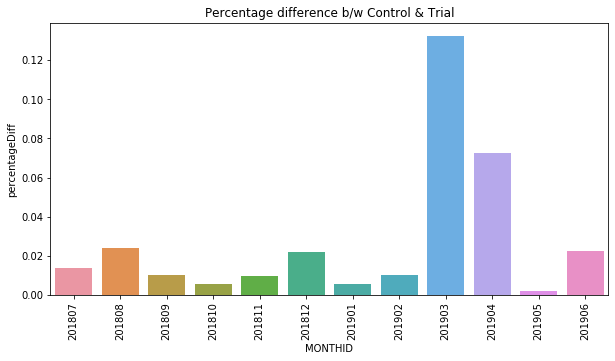

In [140]:
plt.figure(figsize=(10,5))
sns.barplot(x=percentageDiff2.MONTHID,y=percentageDiff2.percentageDiff)
plt.xticks(rotation=90)
plt.title('Percentage difference b/w Control & Trial')
plt.show()

Highest percentage difference can be seen in the month of **MARCH**

In [141]:
assessment2 = percentageDiff2[['MONTHID','controlCust','trialCust']]
assessment2['MONTHID']=pd.to_datetime(assessment2['MONTHID'].astype(str),format='%Y%m')
assessment2.set_index('MONTHID',inplace=True)

assessment2['control-95% confidence interval']=assessment2['controlCust']*(1+stdDev2*2)
assessment2['control-5% confidence interval']=assessment2['controlCust']*(1-stdDev2*2)
assessment2

C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kamakshi\Anaconda3\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,controlCust,trialCust,control-95% confidence interval,control-5% confidence interval
MONTHID,,,,
2018-07-01,127.276836,129,129.163141,125.390531
2018-08-01,134.237288,131,136.226750,132.247826
2018-09-01,125.288136,124,127.144967,123.431304
2018-10-01,122.305085,123,124.117706,120.492464
2018-11-01,131.254237,130,133.199489,129.308985
2018-12-01,123.299435,126,125.126793,121.472077
2019-01-01,116.338983,117,118.063184,114.614782
2019-02-01,125.288136,124,127.144967,123.431304
2019-03-01,118.327684,134,120.081358,116.574010


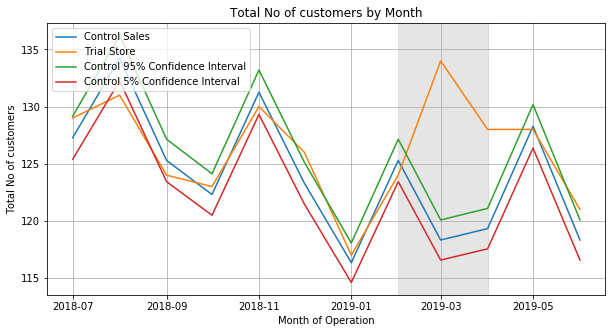

In [143]:
plt.figure(figsize=(10,5))
plt.plot(assessment2)
plt.title('Total No of customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total No of customers')

# Set legend
plt.legend(['Control Sales', 'Trial Store','Control 95% Confidence Interval', 'Control 5% Confidence Interval'], loc = 2)
# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)
plt.grid()
plt.show()

Total number of customers in the trial period for the trial store is significantly higher than the control store
for two out of three months, which indicates a positive trial effect.

### Conclusion
We’ve found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.
The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the
three trial months but this is not the case for trial store 86. We can check with the client if the implementation
of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales. Now that
we have finished our analysis, we can prepare our presentation to the Category Manager.

for powerpoint presentation
- The key take-aways from the Pyramid Principle at McKinsey were:
- Start with the answer first.
- Group and summarize your supporting arguments.
- Logically order your supporting ideas.